# **Enapsys Energy Demand**

**General description:**

The electricity demand of France is very much dependent on weather data. The demand of France is an important driver of European electricity prices, as it is one of the biggest countries. France has a lot of interconnections with surrounding countries. Hence, in periods of high demand France is likely to import electricity from neighboring countries, which will result in higher prices in France and the other countries. In periods of low demand, France is likely to export, which will result in lower prices. That is the reason that market parties need a good insight and forecast of this demand in France.



**Assignment:**

Please create a demand forecast for France on an hourly level up to 48 hours ahead, for the French Market. For example, if you create a forecast on 11 March at 00:00. You will forecast the demand until March 13th at 00:00.



**Extra analysis:** 

Please indicate, on a monthly basis, what the average demand is for a weekday or a weekend at a certain temperature. We are very interested to see what one degree colder in winter or one degree warmer in summer has, as an effect on demand.


The data for the analysis is contained in the following csv files:



**dataset.csv** - Demand Actual data is the target value, which has to be forecasted. This is the aggregated demand of France on an hourly level. The dataset consists of different features, which possibly can be used. 


**dataset_coords.csv** - This dataset contains weather data on a coordinate level. Although the target (demand) is aggregated over France, the weather can be different over the country.




   ***
##**Phase 2: Model Design**
***
### **Phase 2 Notebook Content:**
 1. Project Overview
 2. Notebook setup - Libraries and data imports
 3. Data Overview
  - Data shape
  - preview
  - data type (columns)
  - Statistical summary
  - missing values
 4. Data Cleaning
 5. Model Design
 6. Export of final models

***

### **2. Notebook Setup**

In [ ]:
!pip install holidays --upgrade

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import holidays
from sklearn import feature_selection as fs
from sklearn import model_selection as ms
import numpy.random as nr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import metrics as m
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pickle


from numpy import array
#importing the different randoms
import os
import numpy.random as nr
import random as rn
import tensorflow as tf

os.environ['PYTHONHASHSEED']='0'
nr.seed(24)

In [ ]:
df = pd.read_csv('dataset.csv')

### **3. Data overview**

In [ ]:
print('Date Shape')
df.shape

Date Shape


(45432, 17)

In [ ]:
print('Data preview')
df.head()

Data preview


,Unnamed: 0,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
0,2017-01-01 00:00:00+01:00,76345.25,0.0,NaN,5756.44,597.50,10513.95,0.0,2.45,-3.80,102875.0,0.0,271.60,269.82,269.84,209.0,2.97
1,2017-01-01 01:00:00+01:00,75437.00,0.0,NaN,5756.44,597.50,10513.95,0.0,2.48,-3.46,102839.0,0.0,271.62,269.85,269.79,212.0,3.13
2,2017-01-01 02:00:00+01:00,73368.25,0.0,NaN,5756.44,635.25,10513.95,0.0,4.62,-5.48,102735.0,0.0,271.61,269.93,269.58,218.0,3.25
3,2017-01-01 03:00:00+01:00,72116.00,0.0,NaN,5756.44,628.50,10513.95,0.0,6.13,-6.91,102660.0,0.0,271.60,269.99,269.44,218.0,3.37
4,2017-01-01 04:00:00+01:00,68593.75,0.0,NaN,5756.44,608.50,10513.95,0.0,6.75,-7.50,102629.0,0.0,271.60,270.02,269.38,219.0,3.42


In [ ]:
print('Data types')
df.dtypes

Data types


Unnamed: 0                       object
demand [MW]                     float64
solar_actual [MW]               float64
solar_forecast [MW]             float64
solar_inferred_capacity [MW]    float64
wind_actual [MW]                float64
wind_inferred_capacity [MW]     float64
albedo [%]                      float64
cloud_cover [%]                 float64
frozen_precipitation [%]        float64
pressure [Pa]                   float64
radiation [W/m2]                float64
air_tmp [Kelvin]                float64
ground_tmp [Kelvin]             float64
apparent_tmp [Kelvin]           float64
wind_direction [angle]          float64
wind_speed [m/s]                float64
dtype: object

In [ ]:
print('Data overview')
df.info()

Data overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    45432 non-null  object 
 1   demand [MW]                   45429 non-null  float64
 2   solar_actual [MW]             45413 non-null  float64
 3   solar_forecast [MW]           45210 non-null  float64
 4   solar_inferred_capacity [MW]  45432 non-null  float64
 5   wind_actual [MW]              45413 non-null  float64
 6   wind_inferred_capacity [MW]   45432 non-null  float64
 7   albedo [%]                    45415 non-null  float64
 8   cloud_cover [%]               45416 non-null  float64
 9   frozen_precipitation [%]      45422 non-null  float64
 10  pressure [Pa]                 45421 non-null  float64
 11  radiation [W/m2]              45416 non-null  float64
 12  air_tmp [Kelvin]              45422 non-null  

In [ ]:
print('Descriptive Statistics')
df.describe()

Descriptive Statistics


,demand [MW],solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
count,45429.000000,45413.000000,45210.000000,45432.000000,45413.000000,45432.000000,45415.000000,45416.000000,45422.000000,45421.000000,45416.000000,45422.000000,45422.000000,45422.000000,45421.000000,45421.000000
mean,53521.014699,1286.331384,1278.808883,8255.743000,3614.698500,14319.562303,11.157362,55.270664,-31.497639,101754.855772,160.796661,284.324071,284.243751,283.262665,190.253429,5.615327
std,11809.492016,1782.730487,1761.346022,1616.991295,2708.395258,1850.099922,8.476197,25.879619,20.049324,796.112329,220.426850,6.849745,7.473270,7.857066,59.927779,2.156487
min,29415.000000,0.000000,0.000000,5756.440000,391.000000,10494.090000,0.000000,0.000000,-50.000000,97862.000000,0.000000,265.340000,265.250000,259.800000,50.000000,1.270000
25%,44478.000000,0.000000,0.000000,6864.480000,1583.750000,12256.000000,0.000000,34.760000,-47.380000,101346.000000,0.000000,279.120000,278.600000,277.060000,141.000000,4.070000
50%,51757.000000,175.500000,154.450000,7992.890000,2712.750000,15009.340000,14.750000,57.830000,-38.590000,101790.000000,26.525000,283.630000,283.385000,283.050000,193.000000,5.220000
75%,61726.000000,2262.500000,2332.147500,9595.960000,4923.250000,15985.940000,17.180000,76.960000,-21.360000,102219.000000,280.540000,289.010000,288.970000,288.990000,240.000000,6.720000
max,94587.250000,8511.750000,7900.170000,11244.010000,14475.750000,16116.790000,31.550000,99.940000,88.290000,104134.000000,916.430000,308.000000,310.320000,308.370000,325.000000,16.930000


### **4. Data Cleaning**

In [ ]:
df.rename(columns={"Unnamed: 0" : 'Date'}, inplace=True)
#convert to UTC time format
df['Date'] = pd.to_datetime(df['Date'], utc=True)   #default

#convert to needed timezone
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x).tz_convert('Europe/Paris'))
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')


### **4.1 Formatting data and handling missing values**

In [ ]:
#fill forecast with 0
df['solar_forecast [MW]'] = df['solar_forecast [MW]'].fillna(0)

In [ ]:
#creating a separate data for weekly and monthly analysis
df1 = df.copy()

df1['Date'] = pd.to_datetime(df1['Date'], format="%Y-%m-%d %H")

df1 = df1.interpolate(method='bfill')
df1 = df1.interpolate(method='ffill')

In [ ]:
print('Missing values')
df1.isnull().sum()

Missing values


Date                            0
demand [MW]                     0
solar_actual [MW]               0
solar_forecast [MW]             0
solar_inferred_capacity [MW]    0
wind_actual [MW]                0
wind_inferred_capacity [MW]     0
albedo [%]                      0
cloud_cover [%]                 0
frozen_precipitation [%]        0
pressure [Pa]                   0
radiation [W/m2]                0
air_tmp [Kelvin]                0
ground_tmp [Kelvin]             0
apparent_tmp [Kelvin]           0
wind_direction [angle]          0
wind_speed [m/s]                0
dtype: int64

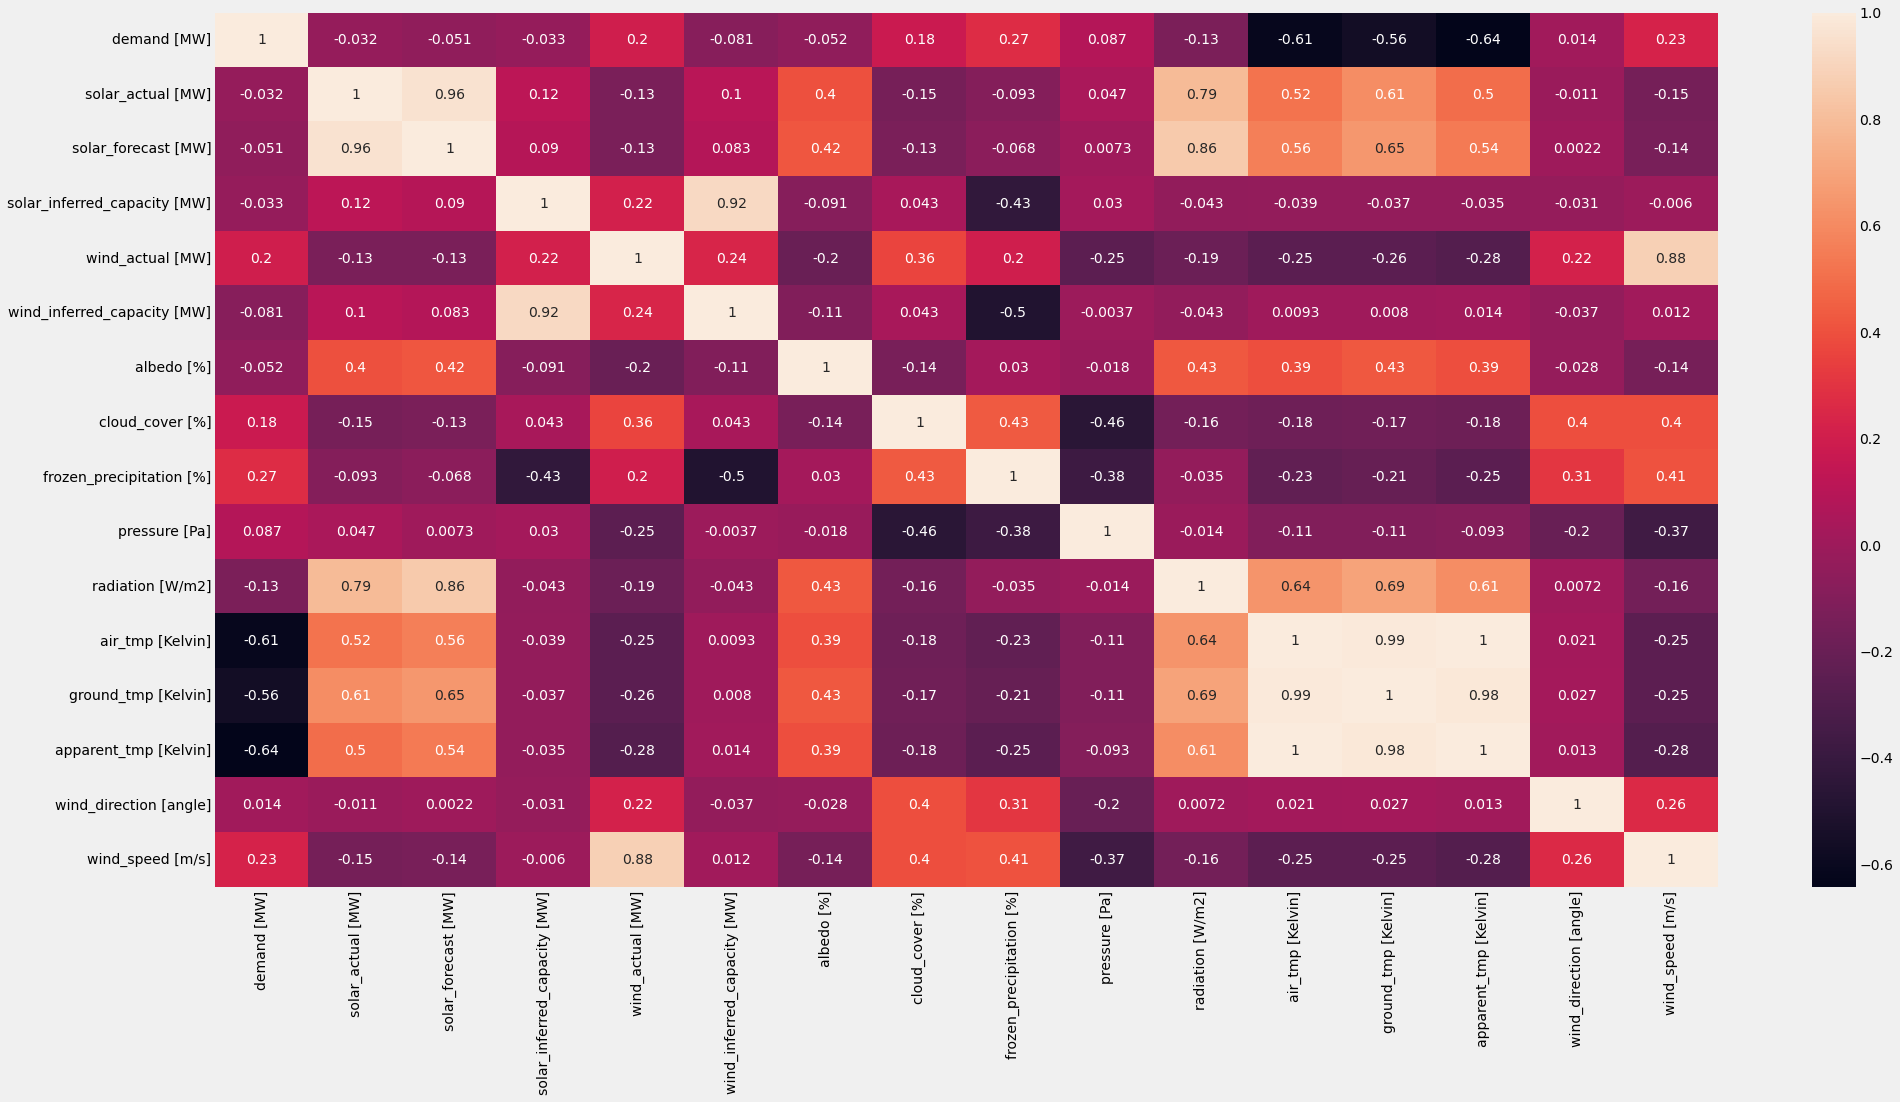

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(), annot=True)

From the heatmap, air temperature, ground temperature and aparent temperature show strong multi collinearity, since apparent temperature predictes demand more, we will select only the apparent temperature.

### **4.2 Creating useful variables for analysis**

NOTE: **Since France is large in geographical area and the weather seasons differ, we will use the average temperature as a classifier.**

In [ ]:
df1['hour'] = df1['Date'].dt.hour
df1['day'] = df1['Date'].dt.dayofyear
df1['week'] = df1['Date'].dt.week
df1['month'] = df1['Date'].dt.month
df1['weekday'] = df1['Date'].dt.day_name()

#dictionary for useful variables
#France's Holidays
FR_holidays = holidays.FR()
df1['holiday'] = [1 if d in FR_holidays else 0 for d in df1['Date']]
df1[df1['holiday'] == 1]

df1['isWorkDay'] = df1.apply(lambda x: 'no' if ((x['holiday'] == 1) or
                                          (x['weekday'] in ['Sunday', 'Saturday'])) else 'yes', axis=1)

avg_temp = df1['apparent_tmp [Kelvin]'].mean()
df1['Gr_avgTemp'] = ['Above' if t > avg_temp else 'Below' for t in df1['apparent_tmp [Kelvin]']]

cat_cols = ['hour','day','week','month','weekday','holiday','isWorkDay','Gr_avgTemp']
for col in cat_cols:
  df1[col] = df1[col].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          45432 non-null  datetime64[ns]
 1   demand [MW]                   45432 non-null  float64       
 2   solar_actual [MW]             45432 non-null  float64       
 3   solar_forecast [MW]           45432 non-null  float64       
 4   solar_inferred_capacity [MW]  45432 non-null  float64       
 5   wind_actual [MW]              45432 non-null  float64       
 6   wind_inferred_capacity [MW]   45432 non-null  float64       
 7   albedo [%]                    45432 non-null  float64       
 8   cloud_cover [%]               45432 non-null  float64       
 9   frozen_precipitation [%]      45432 non-null  float64       
 10  pressure [Pa]                 45432 non-null  float64       
 11  radiation [W/m2]            

###**Defining Used Function**

In [ ]:
#creating merics to measure model performance
def metric(y_pred, y_actual, model_name = None):

  print('\nError metrics for {}'.format(model_name))

  R2 = m.r2_score(y_pred, y_actual)
  print('R2 Score: %.2f' % R2)

  MSE = m.mean_squared_error(y_pred, y_actual)
  print('Mean Squared Error: %.2f' % MSE)

  RMSE = sqrt(MSE)
  print('\nRoot Mean Squared Error: %.2f' % RMSE)

  MAE = m.mean_absolute_error(y_pred, y_actual)
  print('Mean Absolute Error: %.2f' % MAE)

  MAPE = m.mean_absolute_percentage_error(y_pred, y_actual)
  print('Mean Absolute Percentage Error: %.4f' % MAPE)

def plot_pred_vs_actual(y_pred, y_actual, model_name=None):
  fig, ax = plt.subplots(1,1, figsize=(15,10))
  ax.scatter(y_pred, y_actual)
  _ = plt.xlabel('Actual Demand [mW]')
  _ = plt.ylabel('Predicted Demand [mW]')
  _ = plt.title('Actual Vs Predicted Demand [mW] for {} model'.format(model_name))
  _ = plt.xlim(20000, 100000)
  _ = plt.ylim(20000, 100000)
  X = np.linspace(*ax.get_xlim())
  _ = ax.plot(X,X)
def coef_plot(val, model, model_name = None):
  _ = plt.figure(figsize=(15,10))
  _ = plt.plot(range(len(val.columns)), model.coef_)
  _ = plt.xticks(range(len(val.columns)), val.columns, rotation = 90)
  _ = plt.margins(0.01)
  _ = plt.axhline(0, linewidth = 0.5, color = 'r')
  _ = plt.xlabel('{} coef'.format(model_name))
  _ = plt.ylabel('features')
  _ = plt.title("Coefficients of {}'s Features". format(model_name))


def split_data(data, test_size = 0.15, col_to_trans = None, scale = False, include_entire_data = False):
  # get train index
  train_index = int(len(data)*(1 - (test_size)))
  samp_data = data.copy()
  if scale and include_entire_data:
    scaler = StandardScaler()
    samp_data[col_to_trans] = scaler.fit_transform(samp_data[col_to_trans])

  X_train = samp_data.drop('Demand', axis=1).iloc[:train_index]
  X_test = samp_data.drop('Demand', axis =1).iloc[train_index:]
  y_train = samp_data.Demand.iloc[:train_index]
  y_test = samp_data.Demand.iloc[train_index:]

  if scale and not include_entire_data:
    scaler = StandardScaler()
    X_train[col_to_trans] = scaler.fit_transform(X_train[col_to_trans])
    X_test[col_to_trans] = scaler.transform(X_test[col_to_trans])

  return X_train, X_test, y_train, y_test




In [ ]:
df1 = df1.rename({'demand [MW]': 'Demand','solar_actual [MW]':'solar_actual',
                  'solar_forecast [MW]':'Solar_forecast','solar_inferred_capacity [MW]':
                  'solar_inferred_capacity','wind_actual [MW]':'wind_actual',
                  'wind_inferred_capacity [MW]':'wind_inferred_capacity',
                  'albedo [%]': 'albedo','cloud_cover [%]':'cloud_cover',
                  'frozen_precipitation [%]':'frozen_precipitation',
                  'pressure [Pa]':'pressure','radiation [W/m2]':'radiation',
                  'air_tmp [Kelvin]':'air_tmp','ground_tmp [Kelvin]':
                  'ground_tmp','apparent_tmp [Kelvin]':'apparent_tmp',
                  'wind_direction [angle]':'wind_direction','wind_speed [m/s]':
                  'wind_speed'}, axis=1)


### **5. Model Design**

In [ ]:
model = ols('Demand ~ C(month) + C(hour) + C(Gr_avgTemp) + C(holiday) + C(isWorkDay) \
            + C(week) + apparent_tmp + solar_inferred_capacity + solar_actual \
                + Solar_forecast + wind_actual + wind_inferred_capacity \
                + albedo + cloud_cover + frozen_precipitation + pressure \
                + radiation + wind_direction + air_tmp + ground_tmp\
                + wind_speed', df1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     4139.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:33:06   Log-Likelihood:            -4.3706e+05
No. Observations:               45432   AIC:                         8.743e+05
Df Residuals:                   45327   BIC:                         8.752e+05
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

**From the analysis By statsmodels LInear regression, columns that are little or non-significant include:**
- **solar_inferred_capacity**
- **solar_actual**
- **Solar_forecast**
- **wind_actual**
- **Gr_avgtemp**
- **wind_inferred_capacity**
- **albedo**
- **cloud_cover** 
- **frozen_precipitation**
- **pressure**
- **radiation**
- **wind_direction**
- **holiday (has been accounted for by isWorkDay)**

In [ ]:
model = ols('Demand ~ C(month) + C(hour) + C(isWorkDay) \
            + C(week) + apparent_tmp + wind_speed + air_tmp + ground_tmp', df1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4257.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:33:08   Log-Likelihood:            -4.3922e+05
No. Observations:               45432   AIC:                         8.786e+05
Df Residuals:                   45340   BIC:                         8.794e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.319e+05   2

###**Dropping ground temperature**

In [ ]:
model = ols('Demand ~ C(month) + C(hour) + C(isWorkDay) \
            + C(week) + apparent_tmp + wind_speed + air_tmp', df1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4302.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        00:33:09   Log-Likelihood:            -4.3923e+05
No. Observations:               45432   AIC:                         8.786e+05
Df Residuals:                   45341   BIC:                         8.794e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.359e+05   2

**Note: Dropping the ground temperature reduced the F-statistics(Variance(STD))**

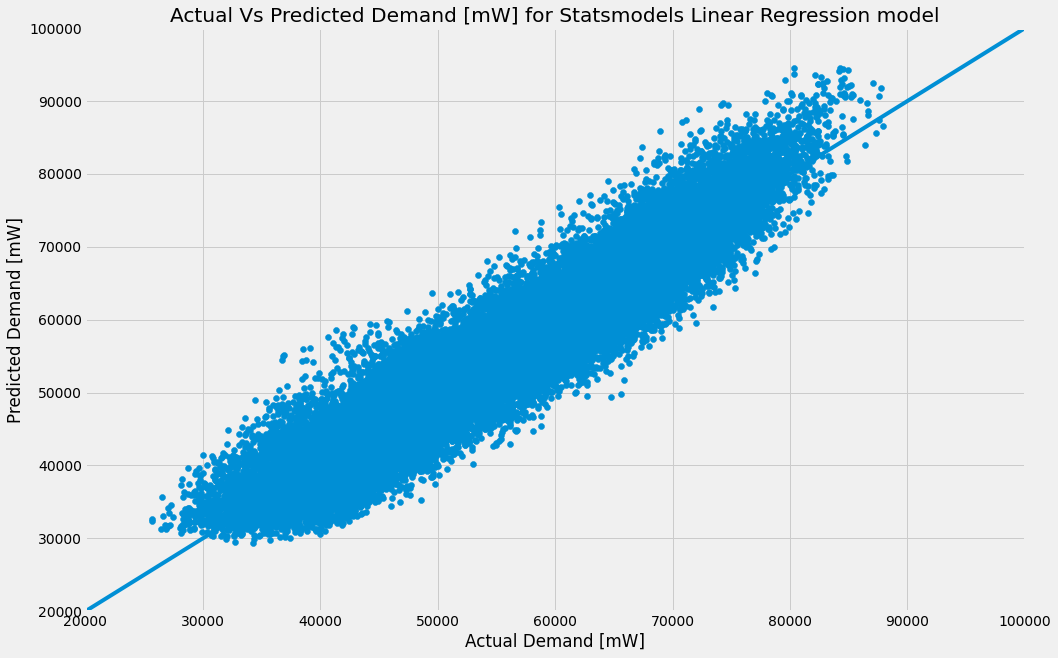

In [ ]:
plot_pred_vs_actual(model.fittedvalues, df1.Demand, model_name = 'Statsmodels Linear Regression')

The model resulted in a good R2 score of 0.895.
 - The most imprtant variables according to the model is th month, hour, week and isWorkday variables.
 - From the result, demand drops gradually from 12 AM to 6 AM after which it starts increasing.


In [ ]:
used_cols = ['Date','Demand', 'month','hour','holiday','isWorkDay',
             'air_tmp','week','apparent_tmp','wind_speed'] 

In [ ]:
sk_df = pd.get_dummies(df1[used_cols], drop_first=True)
sk_df = sk_df.set_index('Date')

In [ ]:
col_to_trans = ['apparent_tmp','wind_speed','air_tmp']
X_train, X_test, y_train, y_test = split_data(sk_df, test_size=0.15,col_to_trans=col_to_trans, scale=True, include_entire_data=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

metric(lr.predict(X_train), y_train, 'Sklearn Linear Regression training data')
metric(pred, y_test, 'Sklearn Linear Regression test data')


Error metrics for Sklearn Linear Regression training data
R2 Score: 0.88
Mean Squared Error: 15069440.97

Root Mean Squared Error: 3881.94
Mean Absolute Error: 3066.35
Mean Absolute Percentage Error: 0.0594

Error metrics for Sklearn Linear Regression test data
R2 Score: 0.90
Mean Squared Error: 13436116.77

Root Mean Squared Error: 3665.53
Mean Absolute Error: 2893.81
Mean Absolute Percentage Error: 0.0544


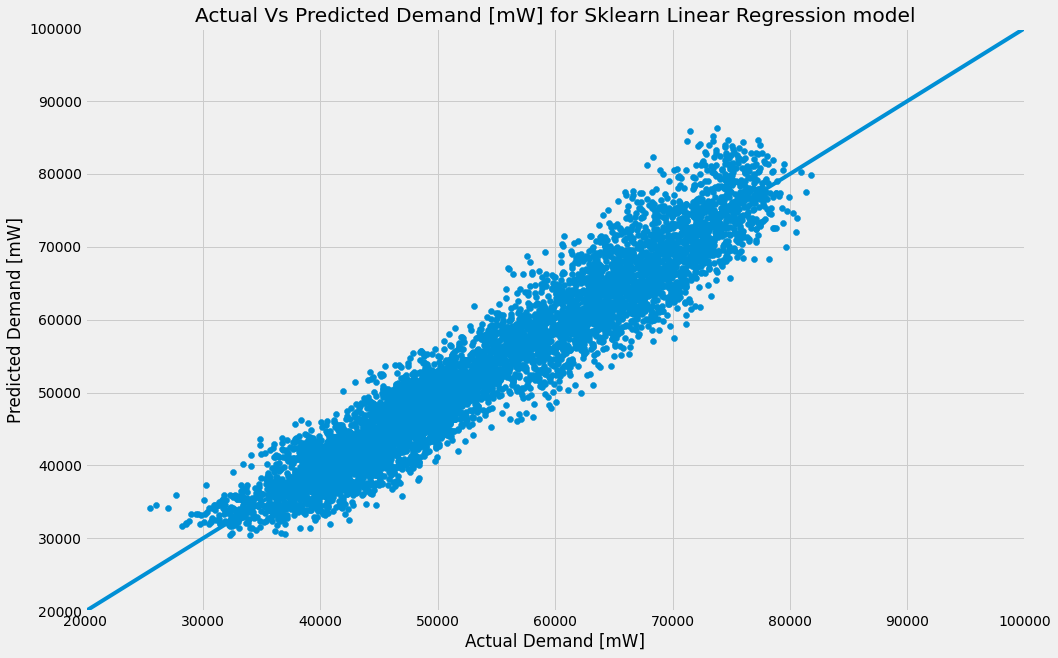

In [ ]:
plot_pred_vs_actual(pred, y_test,model_name='Sklearn Linear Regression')

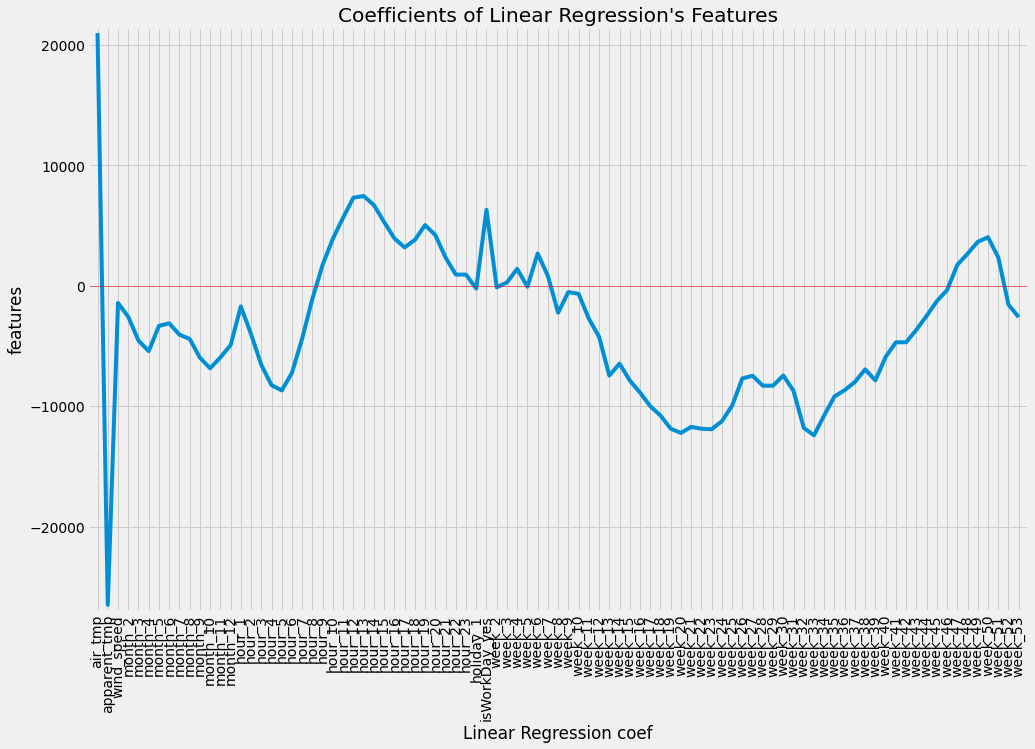

In [ ]:
coef_plot(X_train, lr, 'Linear Regression')

It is observed that the model did well in predicting the demand with R2 and MAPE score of 0.88 and 6.18%.
The week of the year and hour of the day has much effect in the prediction of demand.

Next we run a check on the the strength of the model by camoaring to a naive or persistent forecast which suggests the current value of demand to be thesame as exacly a year back

### **Pesistent(Repeat values from one year ago) model**

In [ ]:
naive_pred = sk_df.loc[X_test.index.shift(-8760, freq='H'),'Demand']
metric(naive_pred[1:], y_test, 'Naive or Persistent model')  #leap year


Error metrics for Naive or Persistent model
R2 Score: 0.74
Mean Squared Error: 39011253.61

Root Mean Squared Error: 6245.90
Mean Absolute Error: 4662.15
Mean Absolute Percentage Error: 0.0880


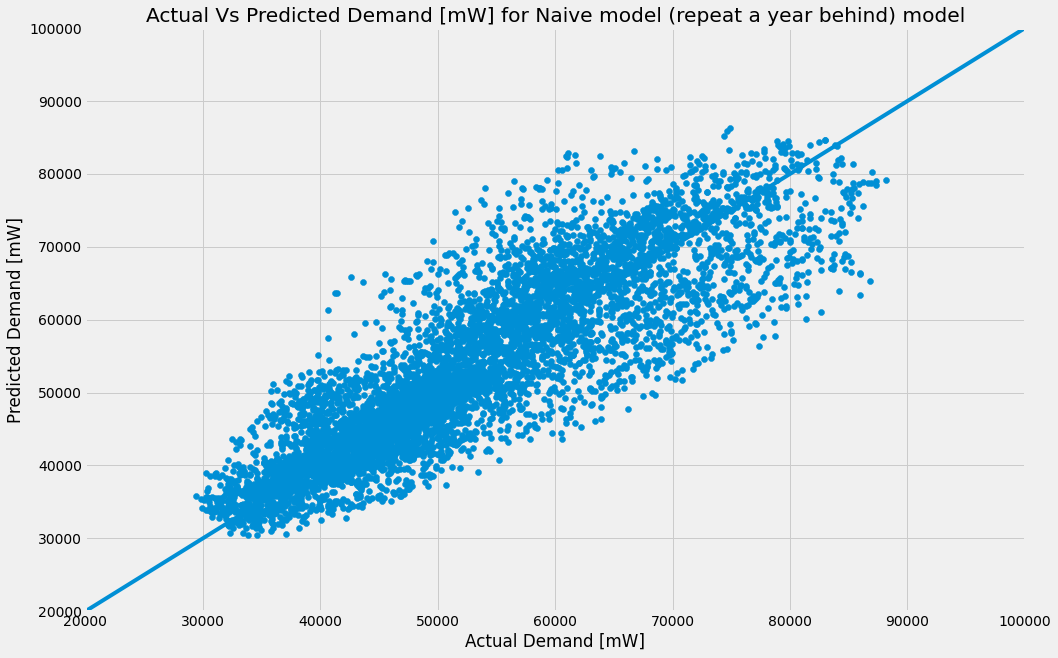

In [ ]:
plot_pred_vs_actual(naive_pred[1:], y_test,model_name='Naive model (repeat a year behind)')

### **Persistent (Repeat last hour) model**

In [ ]:
# one hour ahead for cast
naive_pred2 = sk_df.loc[X_test.index.shift(-1, freq='H'), 'Demand']
metric(naive_pred2[1:], y_test, 'last hour naive forcast')


Error metrics for last hour naive forcast
R2 Score: 0.98
Mean Squared Error: 2607428.15

Root Mean Squared Error: 1614.75
Mean Absolute Error: 886.77
Mean Absolute Percentage Error: 0.0140


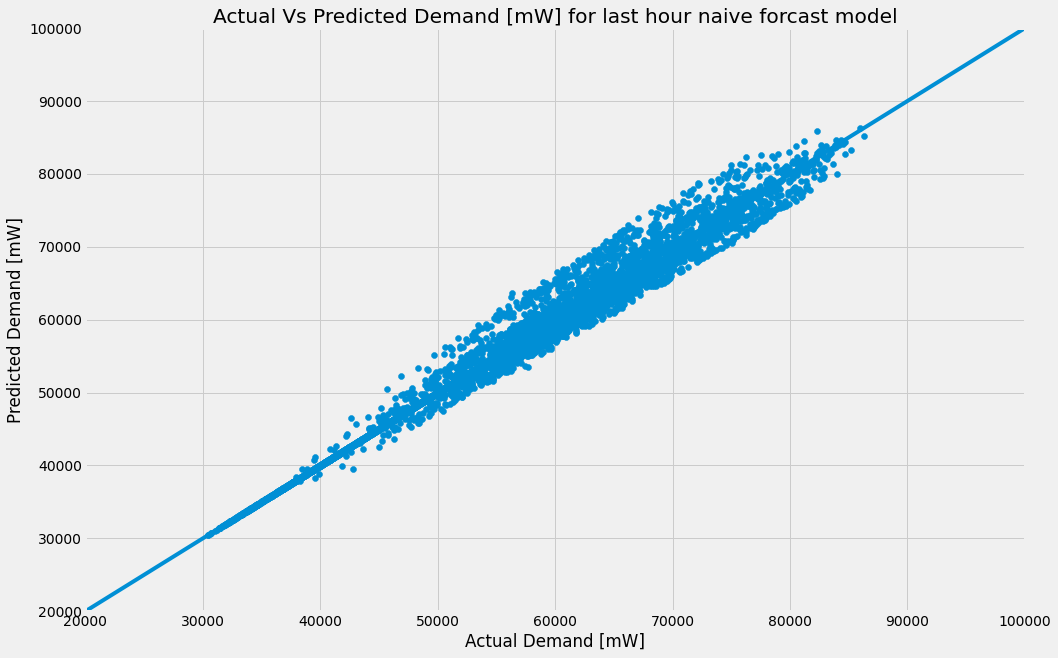

In [ ]:
plot_pred_vs_actual(naive_pred2[1:], y_test, model_name='last hour naive forcast')

### **Persistent (Repeat last one week) model**

In [ ]:
# one week ahead for cast
naive_pred3 = sk_df.loc[X_test.index.shift(-168, freq='H'), 'Demand']
metric(naive_pred3[1:], y_test, 'last week naive forcast')


Error metrics for last week naive forcast
R2 Score: 0.83
Mean Squared Error: 25342996.05

Root Mean Squared Error: 5034.18
Mean Absolute Error: 3554.21
Mean Absolute Percentage Error: 0.0660


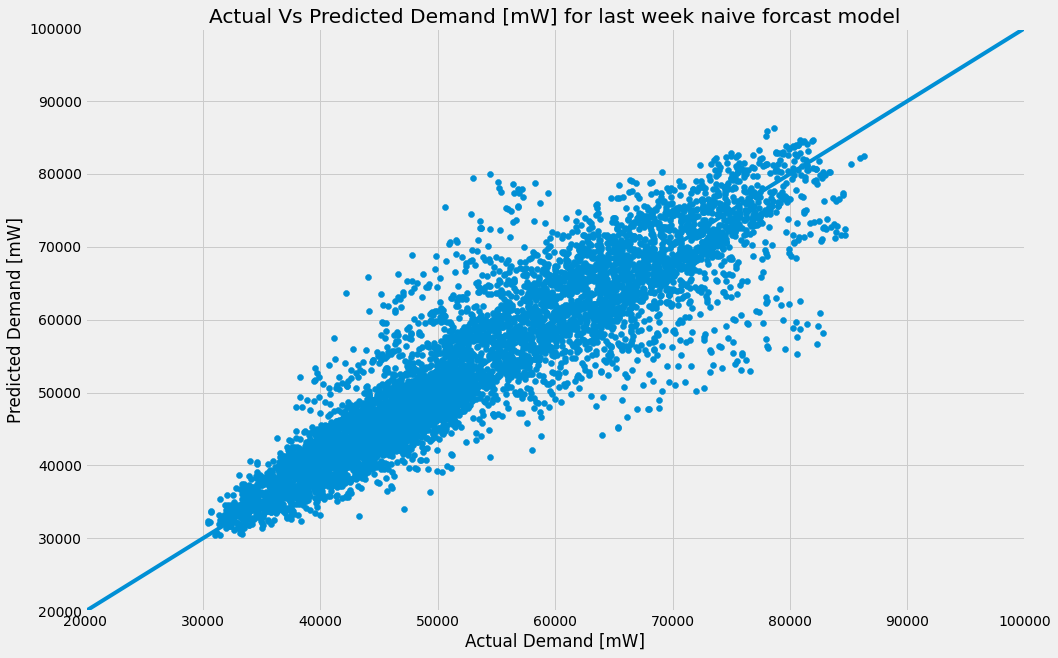

In [ ]:
plot_pred_vs_actual(naive_pred3[1:], y_test, model_name='last week naive forcast')

Since the hour prior shows much correlation in estimating Demand, we will add a 24 hours lag, and remove the week and month column to the dataset and test its performance.

## **Adding 24 hours Lag**

In [ ]:
#with and without wind speed has been tried, the latter was the optimal
cols_used = ['Date','Demand', 'Gr_avgTemp','holiday','isWorkDay','apparent_tmp',
             'wind_speed','air_tmp']
lag_df = df1[cols_used].set_index('Date')
lag_df['Gr_avgTemp'] = [0 if t == 'Below' else 1 for t in lag_df['Gr_avgTemp']]
lag_df['isWorkDay'] = [0 if t == 'no' else 1 for t in lag_df['isWorkDay']]

In [ ]:
# getting 24 hours lag
for i in range(24):
  lag_df['lag' + str(i+1)] = lag_df['Demand'].shift(i+1)
#drop the first 24 hours NaN values
lag = lag_df.dropna()

In [ ]:
cols_to_trans = ['apparent_tmp','wind_speed','air_tmp']
lags_list = ['lag' + str(i+1) for i in range(24)]
cols_to_trans.extend(lags_list)
X_train, X_test, y_train, y_test = split_data(lag,test_size=0.15,
                                              col_to_trans=cols_to_trans, 
                                              scale=True,
                                              include_entire_data=False)

### **Using Random Forest**

In [ ]:
RFR = RandomForestRegressor(max_depth= 9,n_estimators= 40,random_state=3)

#Grid Search was used to select the best parameters
#{'max_depth': 9, 'n_estimators': 40}
#params = {'max_depth': list(range(1,10)),
#          "n_estimators" : [10,20,30,40]}
#RFR_cv = ms.GridSearchCV(RFR,params,cv=4)

RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=40, random_state=3)

In [ ]:
RF_pred = RFR.predict(X_test)
metric(RF_pred, y_test, 'Random Forest')


Error metrics for Random Forest
R2 Score: 0.99
Mean Squared Error: 1086462.03

Root Mean Squared Error: 1042.33
Mean Absolute Error: 751.17
Mean Absolute Percentage Error: 0.0142


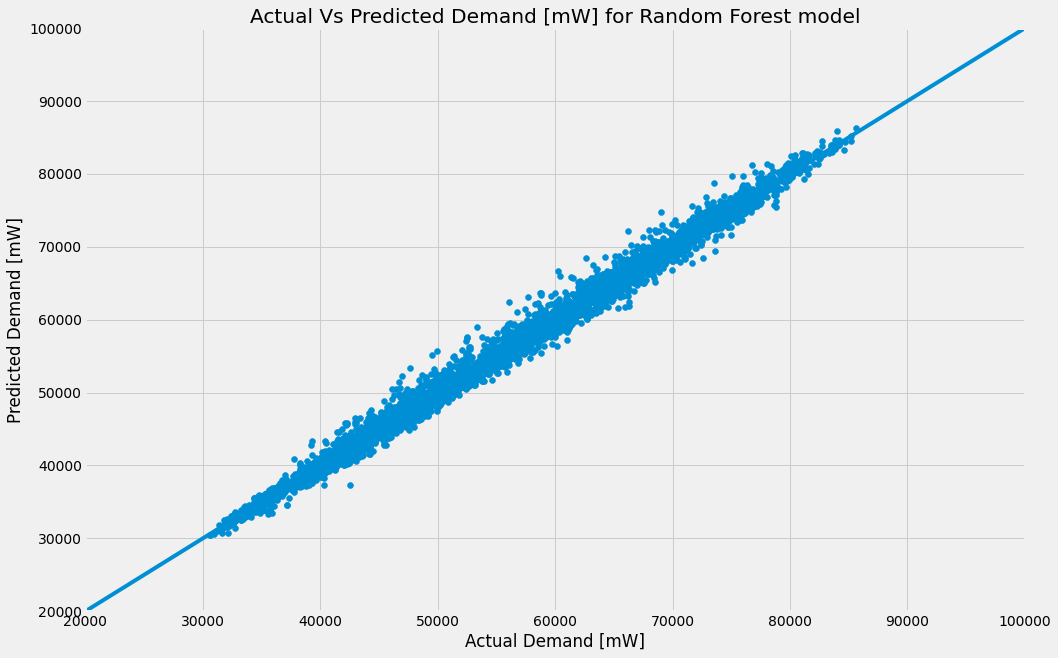

In [ ]:
plot_pred_vs_actual(RF_pred,y_test, 'Random Forest')

### **Using KNN**

In [ ]:
nr.seed(5)
KNN = KNeighborsRegressor(n_neighbors=8)
#using Grid Search 8 niegbors was optimal
#params = {'n_neighbors': np.arange(1,40,1)}
#KNN_cv = ms.GridSearchCV(KNN,params,cv=5)
KNN.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=8)

In [ ]:
KNN_pred = KNN.predict(X_test)
metric(KNN_pred, y_test, 'KNN')


Error metrics for KNN
R2 Score: 0.99
Mean Squared Error: 1395924.55

Root Mean Squared Error: 1181.49
Mean Absolute Error: 853.20
Mean Absolute Percentage Error: 0.0159


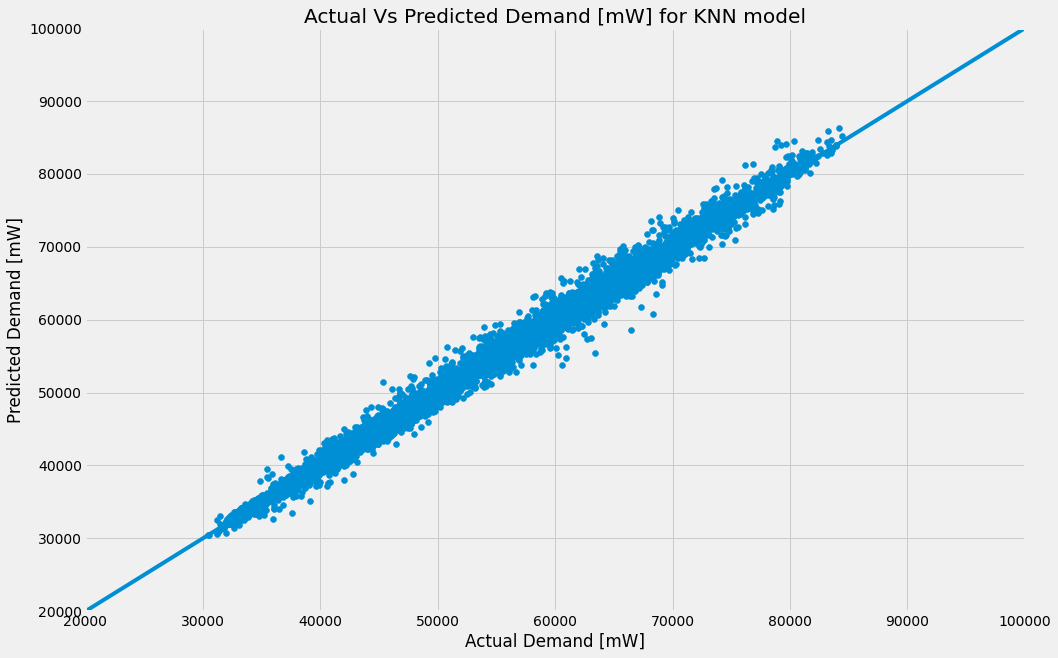

In [ ]:
plot_pred_vs_actual(KNN_pred, y_test,'KNN')

#### **Conclusions** 

- IsWorkDay has proven very important in the estimation of Demand.
- The persistent one year and one week model were outperformed by previous hour.
- Adding a 24 hours lag will make the week and month values insignificant, hence it will be removed.

### **Forecast Analysis**
***
**Defining used function**

In [ ]:
min, max = lag.index.min(), lag.index.max()
data = lag.copy()
data['Date'] = pd.date_range(start = min, end = max, freq='H')
demand_data = data[['Demand']]

def decopose_df(df):
  decompose = seasonal_decompose(df)
  fig = decompose.plot()
  fig.set_size_inches(25,12)
  fig.tight_layout()
  plt.show()

def metricf(fcast, test):
  mae = m.mean_absolute_error(test,fcast)
  print('MAE : %3f' % mae)
  mse = m.mean_squared_error(test,fcast)
  print('MSE : %3f' % mse)
  rmse = sqrt(mse)
  print('RMSE : %3f' % rmse)
  mape = m.mean_absolute_percentage_error(test,fcast)
  print('MAPE : %3f' % mape)


def split_data_fcast(X,y):
  X_train, X_test, y_train, y_test = X[:-168], X[-168:], y[:-168], y[-168:]
  return X_train, X_test, y_train, y_test


def split_sequence_mult(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ts = i + n_steps_in
    out_ts = end_ts + n_steps_out -1 
    if out_ts > len(sequence):
      break;
    seqx, seqy = sequence.iloc[i:end_ts, 1:], sequence.iloc[end_ts-1:out_ts, 0]
    X.append(seqx)
    y.append(seqy)
  return array(X), array(y)

def plot_result(yhat, test, model_name = None):
  pred = array([i for i in yhat]).reshape(-1,1)
  tester = array([i for i in test]).reshape(-1,1)
  pred = pd.DataFrame(pred)
  tester = pd.DataFrame(tester)
  result = pd.concat([pred, tester],ignore_index=True, axis=1)
  plt.figure(figsize=(25,18))
  plt.plot(result[-300:][0], color = 'blue', label="Forecasted Demand")
  plt.plot(result[-300:][1],color = 'green', label="Actual Demand")
  plt.legend(loc='upper left')
  plt.title('Forecasted and Actual Demand of {}'.format(model_name))
  plt.xlabel('Hours')
  plt.ylabel('Demand')
  print('Accuracy: {}'.format(m.r2_score(pred, tester)))

### **24 hours ahead forecast**

In [ ]:
cols = ['apparent_tmp','wind_speed','air_tmp']
lags_list = ['lag' + str(i+1) for i in range(24)]
cols.extend(lags_list)

scaler = StandardScaler()
lag[cols] = scaler.fit_transform(lag[cols])

In [ ]:
n_steps_in, n_steps_out = 48,24
X, y = split_sequence_mult(lag, n_steps_in=n_steps_in,n_steps_out=n_steps_out)

In [ ]:
#flatten inputs
n_inputs, n_out = X.shape[1] * X.shape[2], 24
XC = X.reshape(X.shape[0], n_inputs)

X_train, X_test, y_train, y_test = split_data_fcast(XC,y)


### **MLP model**

In [ ]:
rn.seed(24)
tf.random.set_seed(24)

MLP_model = Sequential()
MLP_model.add(Dense(800, activation='relu', input_dim=n_inputs))
MLP_model.add(Dense(n_out))
MLP_model.compile(optimizer='adam', loss='mse')
MLP_model.fit(X_train, y_train, epochs=600, verbose=1)

In [ ]:
yhat=MLP_model.predict(X_test)
test = y_test
metricf(yhat, test)

In [ ]:
with open('Enapsys_MLP_24 (1)', 'wb') as f:
  pickle.dump(MLP_model,f)

INFO:tensorflow:Assets written to: ram://b01f16ad-ff76-4088-9095-e530d857fd3c/assets


In [ ]:
with open('Enapsys_MLP_24 (1)', 'rb') as f:
  model1 = pickle.load(f)

yhat=model1.predict(X_test)
test = y_test
metricf(yhat, test)

MAE : 1111.795235
MSE : 2087151.027491
RMSE : 1444.697556
MAPE : 0.018105


Accuracy: 0.9295962338925137


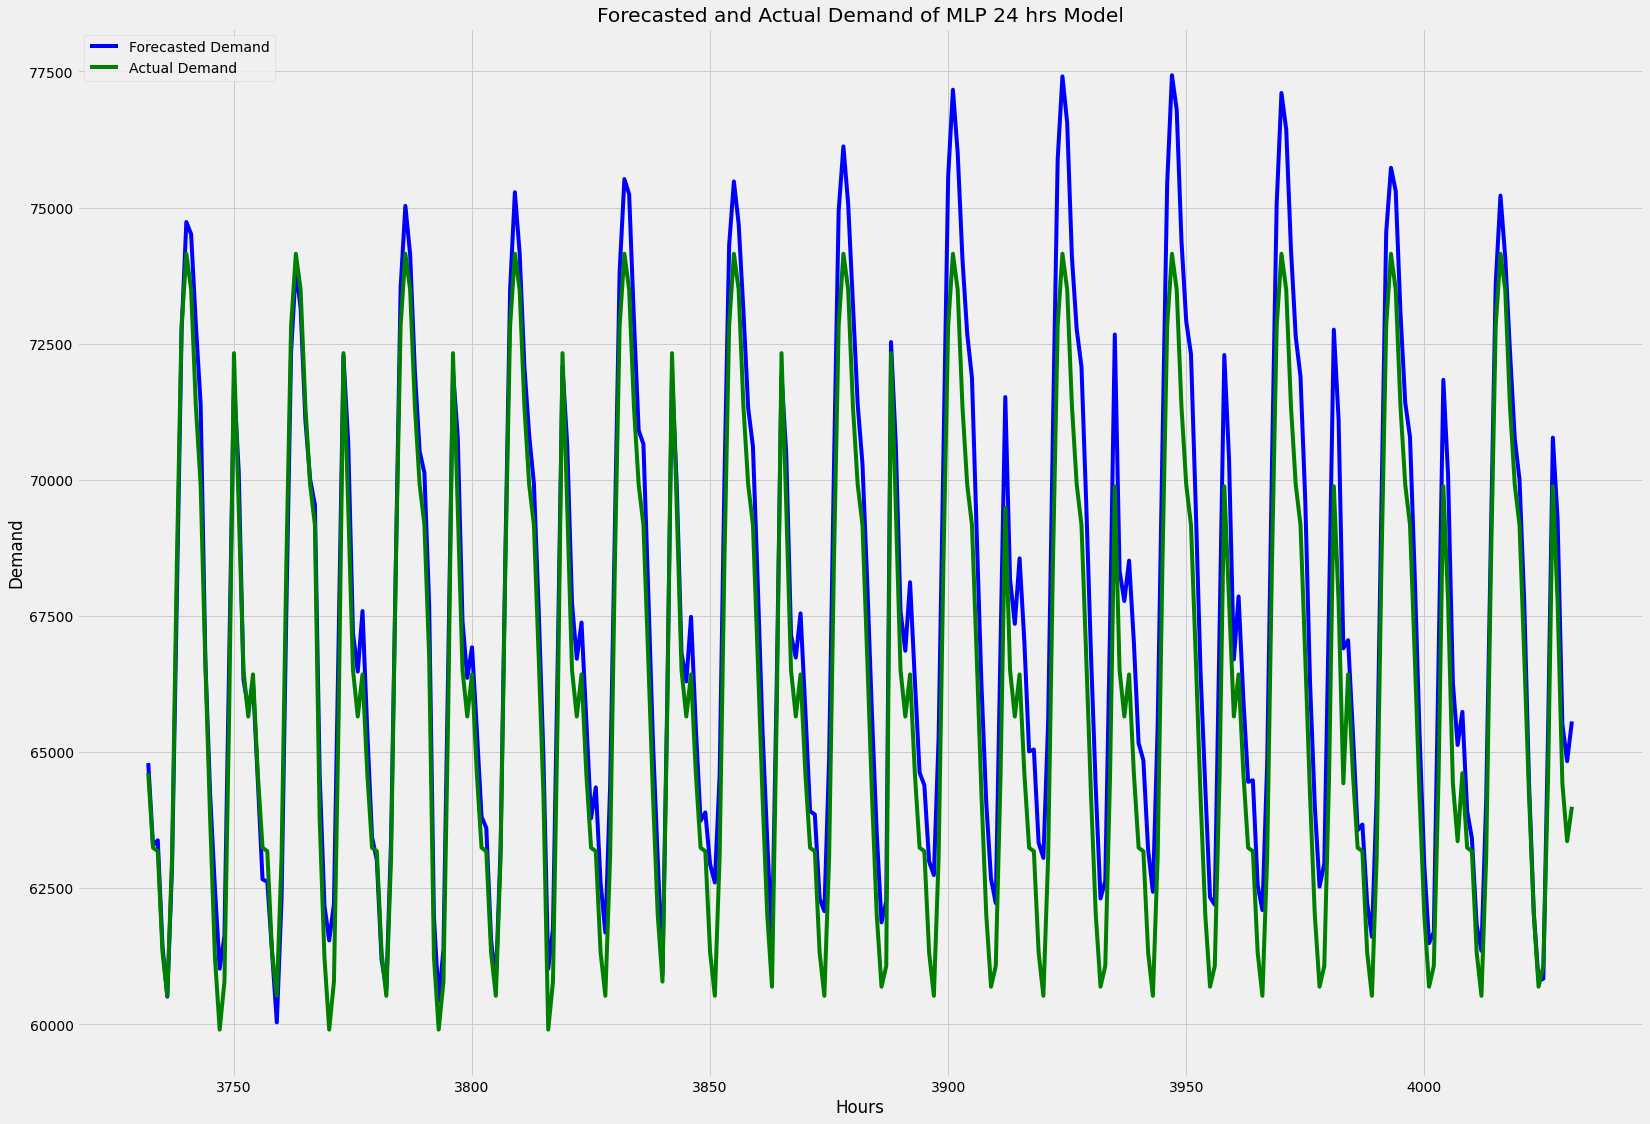

In [ ]:
plot_result(yhat, test, 'MLP 24 hrs Model')
 

### **CNN model**

In [ ]:
n_in, n_out = 48, 24
#X,y = split_sequence_mult(lag,n_in, n_out)

X_train, X_test, y_train, y_test = split_data_fcast(X,y)

rn.seed(24)
tf.random.set_seed(24)


n_features = 30
# define model
CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_in,
n_features)))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(800, activation='relu'))
CNN_model.add(Dense(n_out))
CNN_model.compile(optimizer='adam', loss='mse')
# fit model
CNN_model.fit(X_train, y_train, epochs=600, verbose=1)

In [ ]:
with open('Enapsys_CNN_24', 'wb') as f:
  pickle.dump(CNN_model,f)

In [ ]:
with open('Enapsys_CNN_24', 'rb') as f:
  model2 = pickle.load(f)

yhat=model2.predict(X_test)
test = y_test
metricf(yhat, test)

MAE : 1065.528757
MSE : 1917235.762955
RMSE : 1384.642829
MAPE : 0.017352


Accuracy: 0.9341158897978081


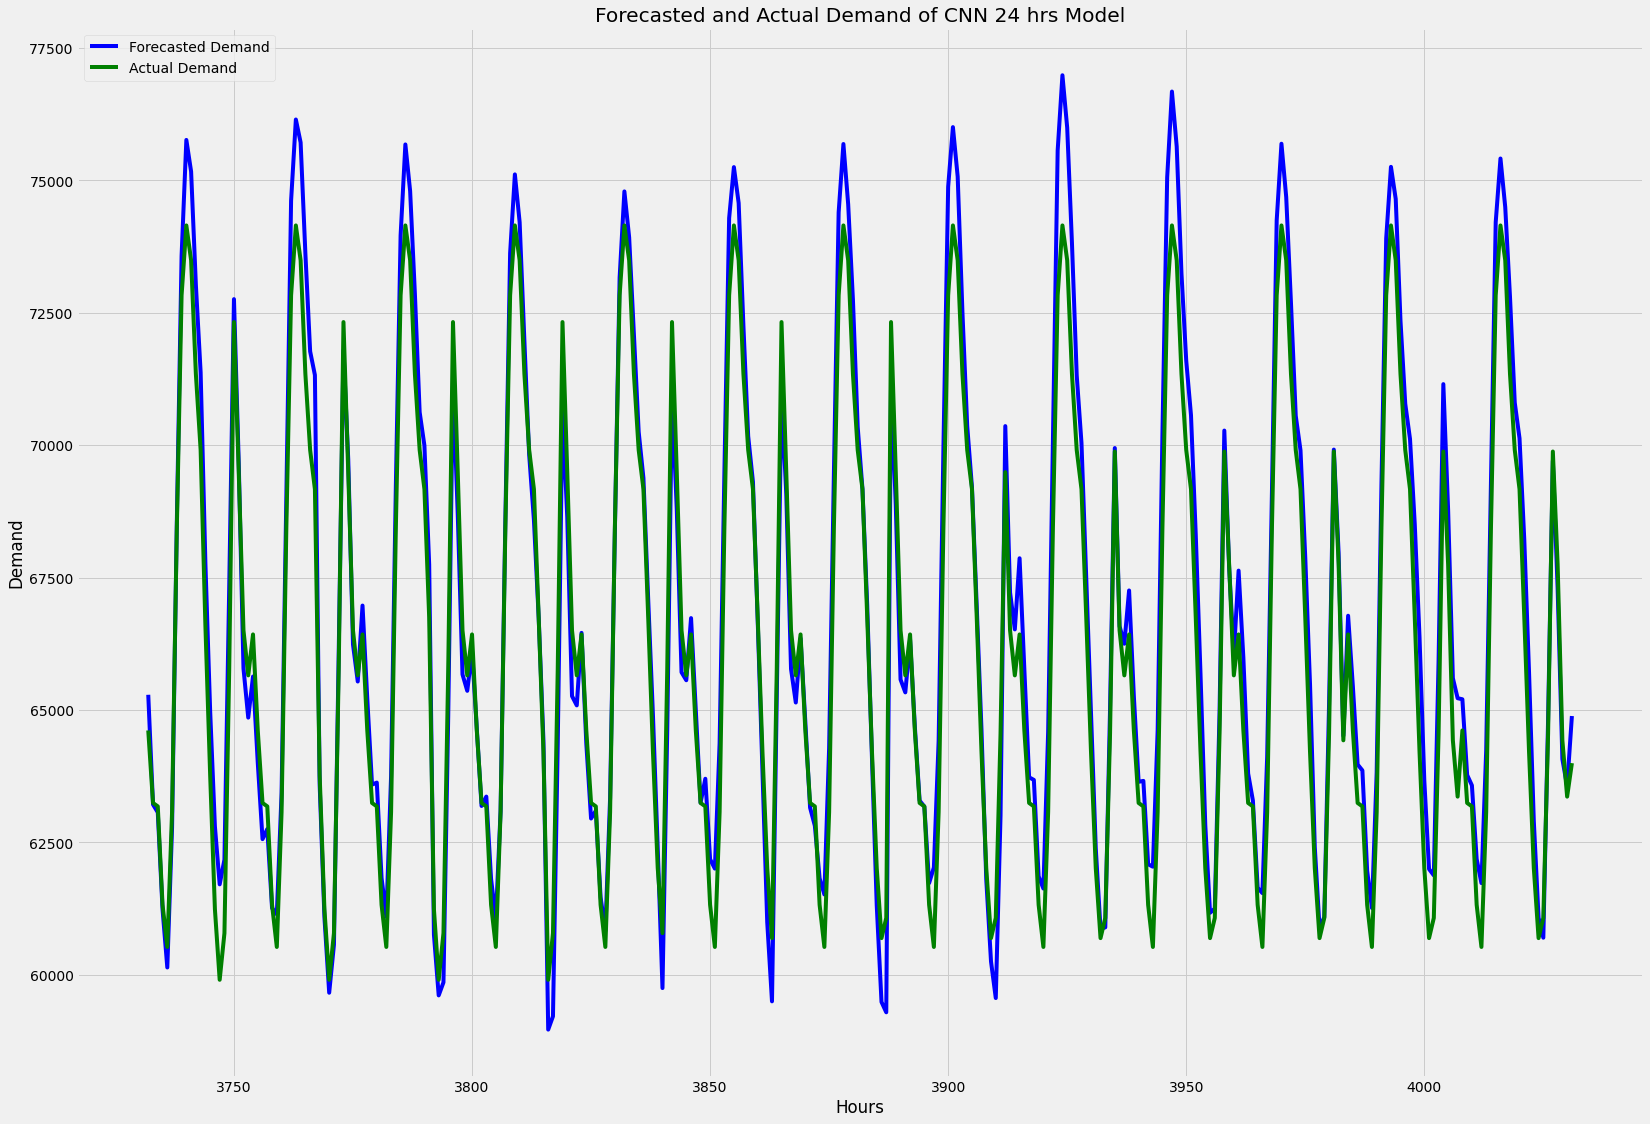

In [ ]:
plot_result(yhat, test, 'CNN 24 hrs Model')

### **All For One 48 hours ahead forecast**

Wind Speed and Air temperature was tested and model performance was better without.

#### **Test on last set**

In [ ]:
new_lag =  lag.drop(['wind_speed','air_tmp'], axis=1)
cols = ['apparent_tmp']
lags_list = ['lag' + str(i+1) for i in range(24)]
cols.extend(lags_list)

scaler = StandardScaler()
new_lag[cols] = scaler.fit_transform(new_lag[cols])

In [ ]:
n_steps_in, n_steps_out = 48,48
X, y = split_sequence_mult(new_lag, n_steps_in=n_steps_in,n_steps_out=n_steps_out)

In [ ]:
#flatten inputs
n_inputs, n_out = X.shape[1] * X.shape[2], 48
XM = X.reshape(X.shape[0], n_inputs)

X_train, X_test, y_train, y_test = XM[:-1], XM[-1:], y[:-1], y[-1:]

rn.seed(24)
tf.random.set_seed(24)

MLP_model = Sequential()
MLP_model.add(Dense(900, activation='relu', input_dim=n_inputs))
MLP_model.add(Dense(n_out))
MLP_model.compile(optimizer='adam', loss='mse')
MLP_model.fit(X_train, y_train, epochs=800, verbose=1)
#saving the model
with open('Enapsys_MLP_model_48', 'wb') as f:
  pickle.dump(MLP_model,f)

In [ ]:
with open('Enapsys_MLP_model_48', 'rb') as f:
  model1 = pickle.load(f)

yhat=model1.predict(X_test)
test = y_test
metricf(yhat, test)

MAE : 891.840332
MSE : 1053672.229652
RMSE : 1026.485377
MAPE : 0.013603


Accuracy: 0.95169801796613


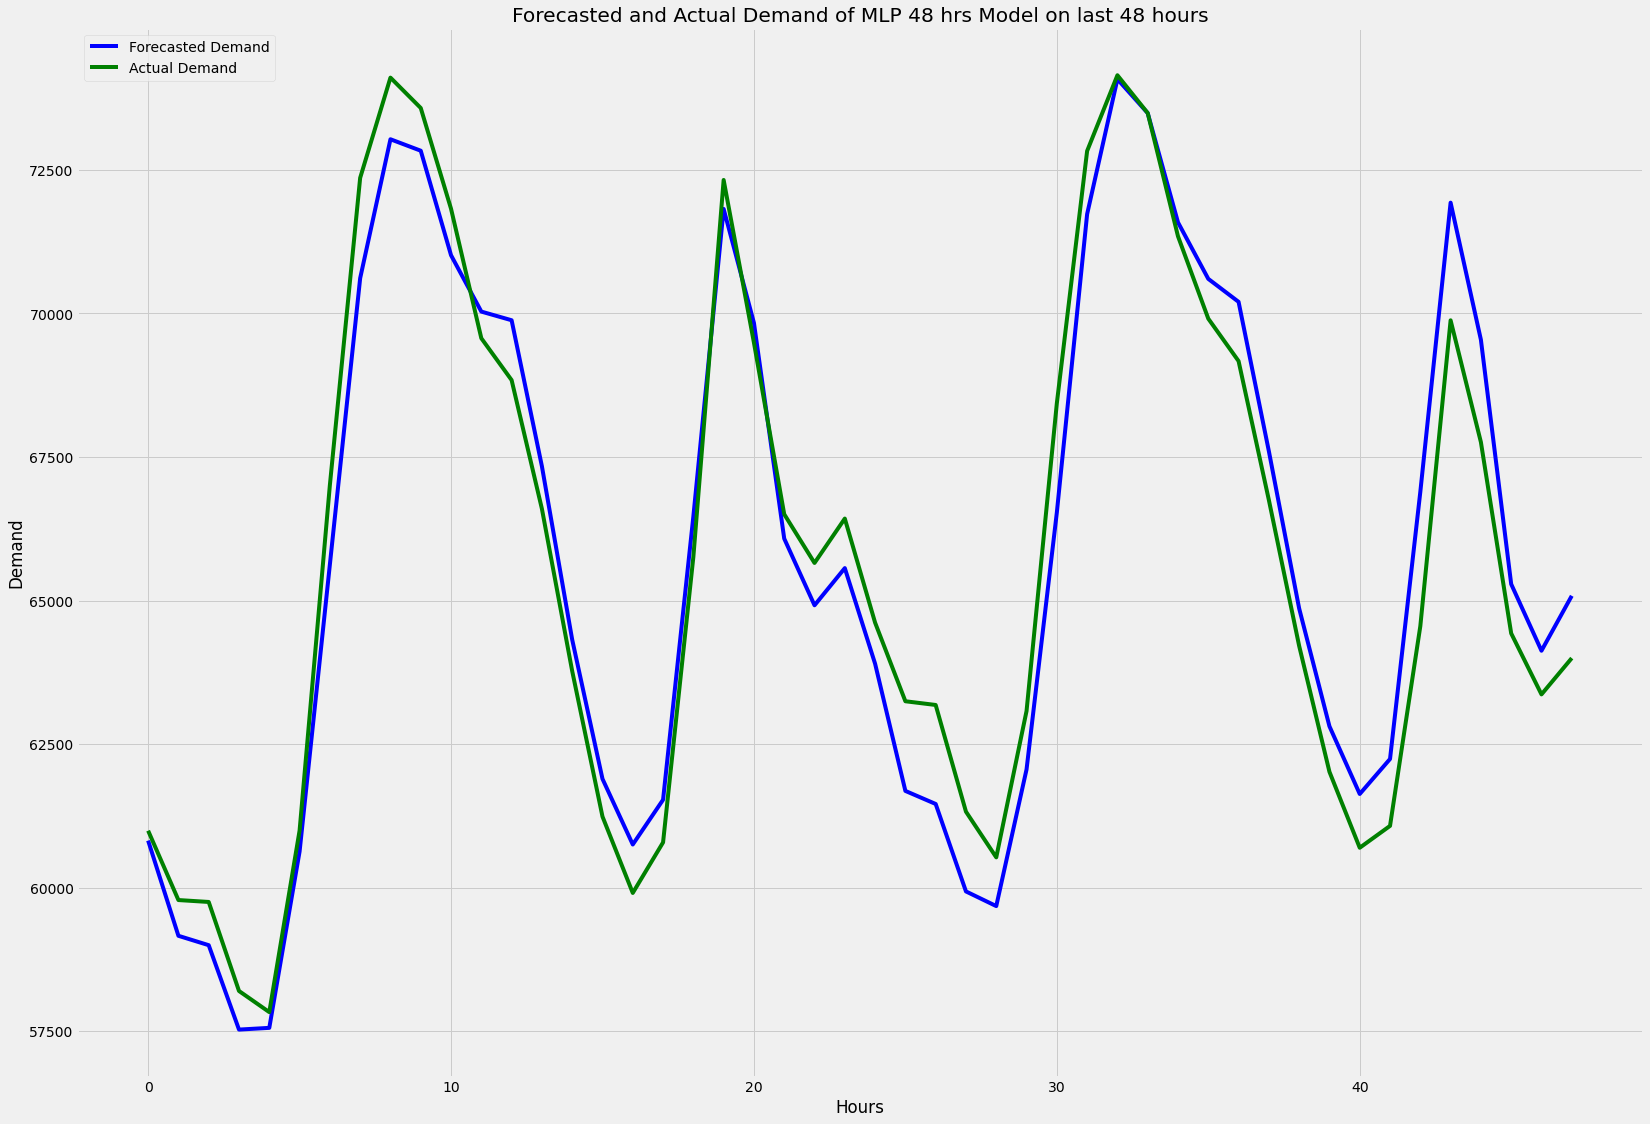

In [ ]:
plot_result(yhat, test, 'MLP 48 hrs Model on last 48 hours')

### **CNN model**

In [ ]:
n_in, n_out = 48, 48
#X,y = split_sequence_mult(lag,n_in, n_out)

X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1], y[-1:]

rn.seed(24)
tf.random.set_seed(24)


n_features = 28
# define model
CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_in,
n_features)))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(800, activation='relu'))
CNN_model.add(Dense(n_out))
CNN_model.compile(optimizer='adam', loss='mse')
# fit model
CNN_model.fit(X_train, y_train, epochs=600, verbose=1)
#saving the model
with open('Enapsys_CNN_model', 'wb') as f:
  pickle.dump(CNN_model,f)

In [ ]:
with open('Enapsys_CNN_model', 'rb') as f:
  model2 = pickle.load(f)

yhat=model2.predict(X_test)
test = y_test
metricf(yhat, test)

MAE : 953.118408
MSE : 1341286.954029
RMSE : 1158.139436
MAPE : 0.014597


Accuracy: 0.9384993570738651


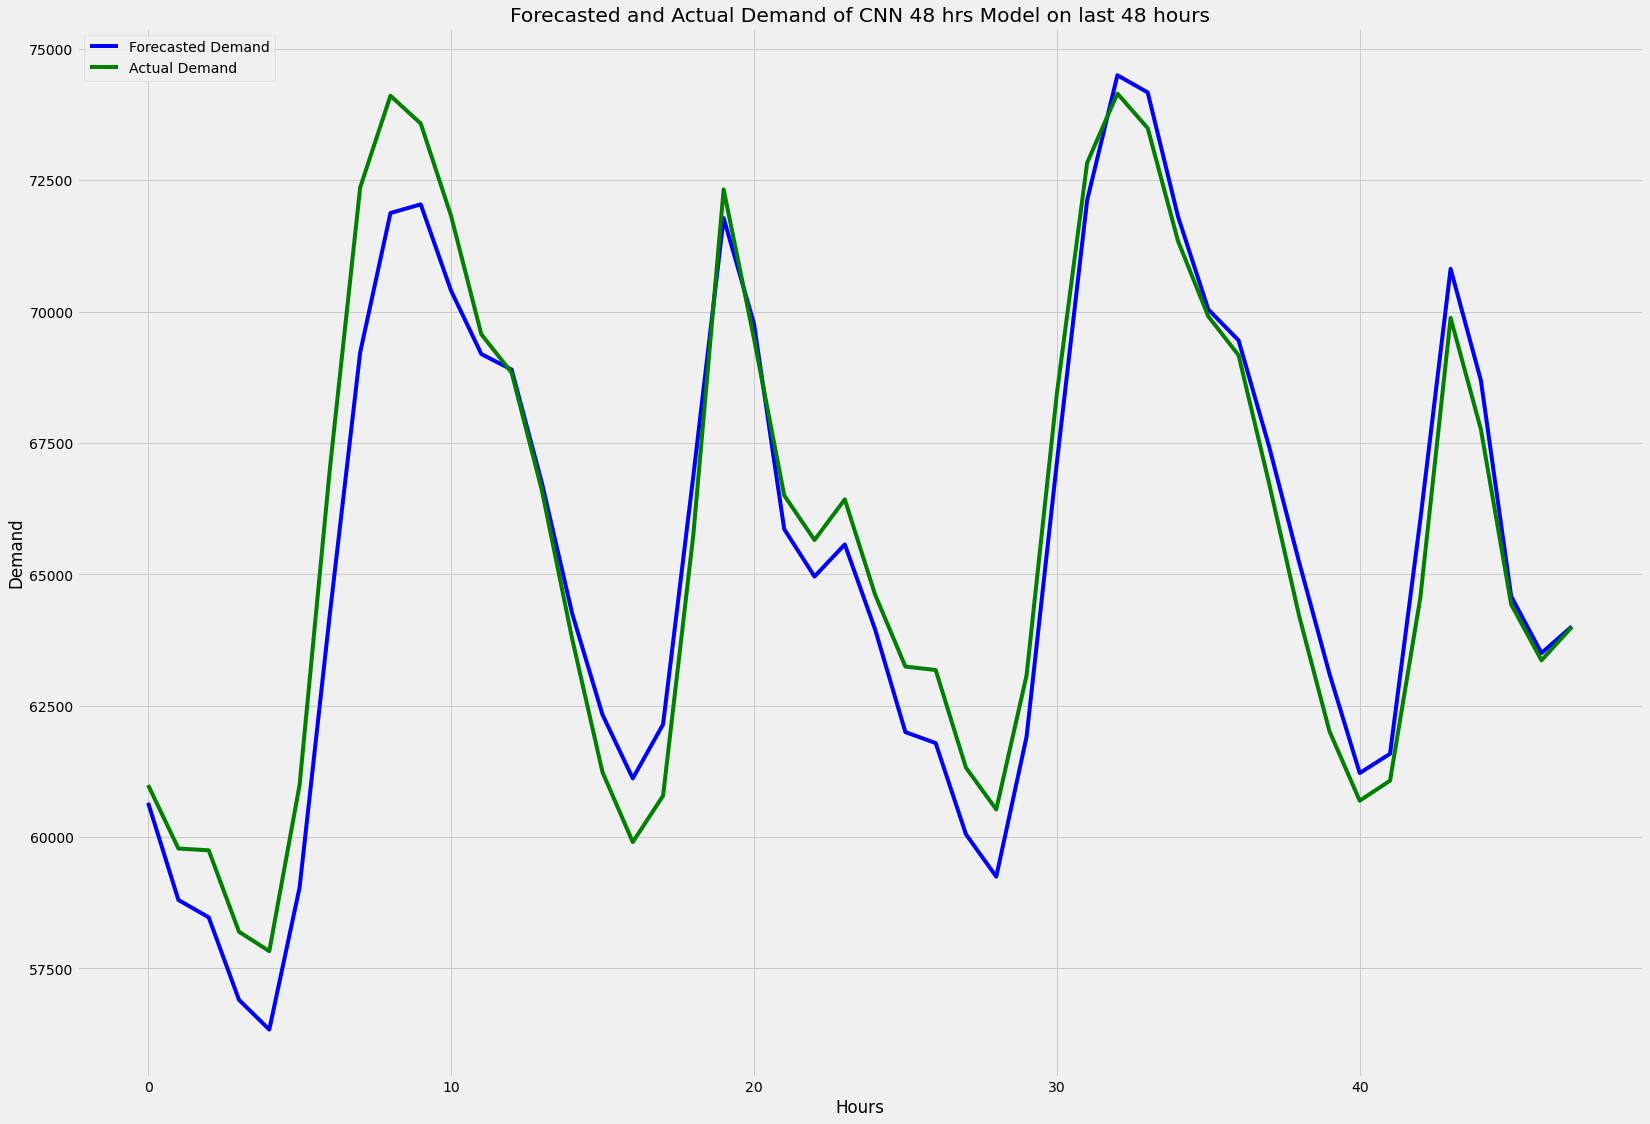

In [ ]:
plot_result(yhat, test, 'CNN 48 hrs Model on last 48 hours')

In [ ]:
with open('Enapsys_CNN_model', 'wb') as f:
  pickle.dump(model,f)

In [ ]:
X.shape

(45314, 48, 28)

### **LSTM**

In [ ]:
#not supported GPU
n_input, n_ft, n_out = 48, X.shape[2], 48

X_train, X_test, y_train, y_test = X[:-1], X[-1], y[:-1],y[-1]

LSTM_model = Sequential()
LSTM_model.add(LSTM(100,activation='relu', input_shape=(n_input,n_ft)))

LSTM_model.add(Dense(n_out))
LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.fit(X_train, y_train, epochs=70, verbose=1)

### **Adding 48 hours lag**

In [ ]:
cols_used = ['Date','Demand', 'Gr_avgTemp','holiday','isWorkDay','apparent_tmp',
             'wind_speed','air_tmp']
lag_df2 = df1[cols_used].set_index('Date')
lag_df2['Gr_avgTemp'] = [0 if t == 'Below' else 1 for t in lag_df2['Gr_avgTemp']]
lag_df2['isWorkDay'] = [0 if t == 'no' else 1 for t in lag_df2['isWorkDay']]

In [ ]:
# getting 48 hours lag
for i in range(48):
  lag_df2['lag' + str(i+1)] = lag_df2['Demand'].shift(i+1)
#drop the first 10 hours NaN values
lag2 = lag_df2.dropna()

In [ ]:
cols2 = ['apparent_tmp','wind_speed','air_tmp']
lags_list2 = ['lag' + str(i+1) for i in range(48)]
cols2.extend(lags_list2)

scaler = StandardScaler()
lag2[cols2] = scaler.fit_transform(lag2[cols2])

In [ ]:
n_steps_in, n_steps_out = 48,48
X, y = split_sequence_mult(lag2, n_steps_in=n_steps_in,n_steps_out=n_steps_out)

In [ ]:
X.shape

(45290, 48, 54)

In [ ]:
#flatten inputs
n_inputs, n_out = X.shape[1] * X.shape[2], 48
XC = X.reshape(X.shape[0], n_inputs)

X_train, X_test, y_train, y_test = split_data_fcast(XC,y)

In [ ]:
rn.seed(24)
tf.random.set_seed(24)

MLP_model = Sequential()
MLP_model.add(Dense(500, activation='relu', input_dim=n_inputs))
MLP_model.add(Dense(n_out))
MLP_model.compile(optimizer='adam', loss='mse')
MLP_model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
1411/1411 [==============================] - 6s 4ms/step - loss: 790730112.0000
Epoch 2/500
1411/1411 [==============================] - 5s 4ms/step - loss: 296594176.0000
Epoch 3/500
1411/1411 [==============================] - 5s 4ms/step - loss: 121153080.0000
Epoch 4/500
1411/1411 [==============================] - 5s 4ms/step - loss: 93439280.0000
Epoch 5/500
1411/1411 [==============================] - 5s 4ms/step - loss: 71358416.0000
Epoch 6/500
1411/1411 [==============================] - 5s 4ms/step - loss: 54839320.0000
Epoch 7/500
1411/1411 [==============================] - 5s 4ms/step - loss: 45777204.0000
Epoch 8/500
1411/1411 [==============================] - 5s 4ms/step - loss: 39527444.0000
Epoch 9/500
1411/1411 [==============================] - 5s 4ms/step - loss: 34407208.0000
Epoch 10/500
1411/1411 [==============================] - 5s 4ms/step - loss: 30187512.0000
Epoch 11/500
1411/1411 [==============================] - 5s 4ms/step - loss: 26755676

In [ ]:
yhat=MLP_model.predict(X_test)
test = y_test
metricf(yhat, test)

MAE : 1569.489713
MSE : 4394036.500980
RMSE : 2096.195721
MAPE : 0.025407


0.8303523951603168


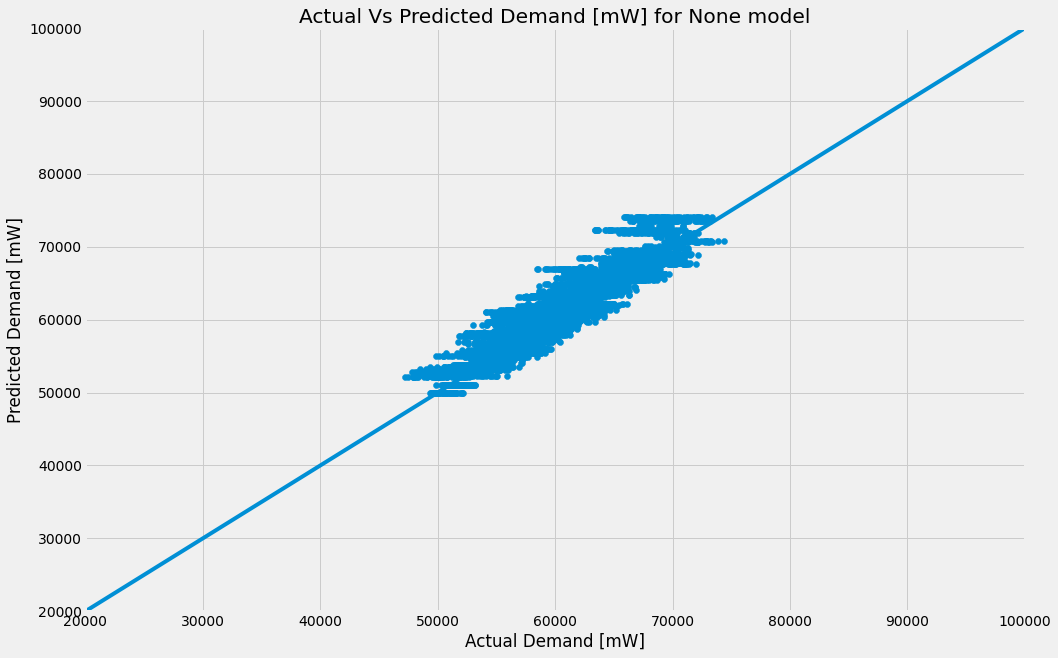

In [ ]:
pred = array([i for i in yhat]).reshape(-1,1)
tester = array([i for i in test]).reshape(-1,1)
print(m.r2_score(pred, tester))
plot_pred_vs_actual(pred,tester)

In [ ]:
pred = pd.DataFrame(pred)
tester = pd.DataFrame(tester)
result = pd.concat([pred, tester],ignore_index=True, axis=1)

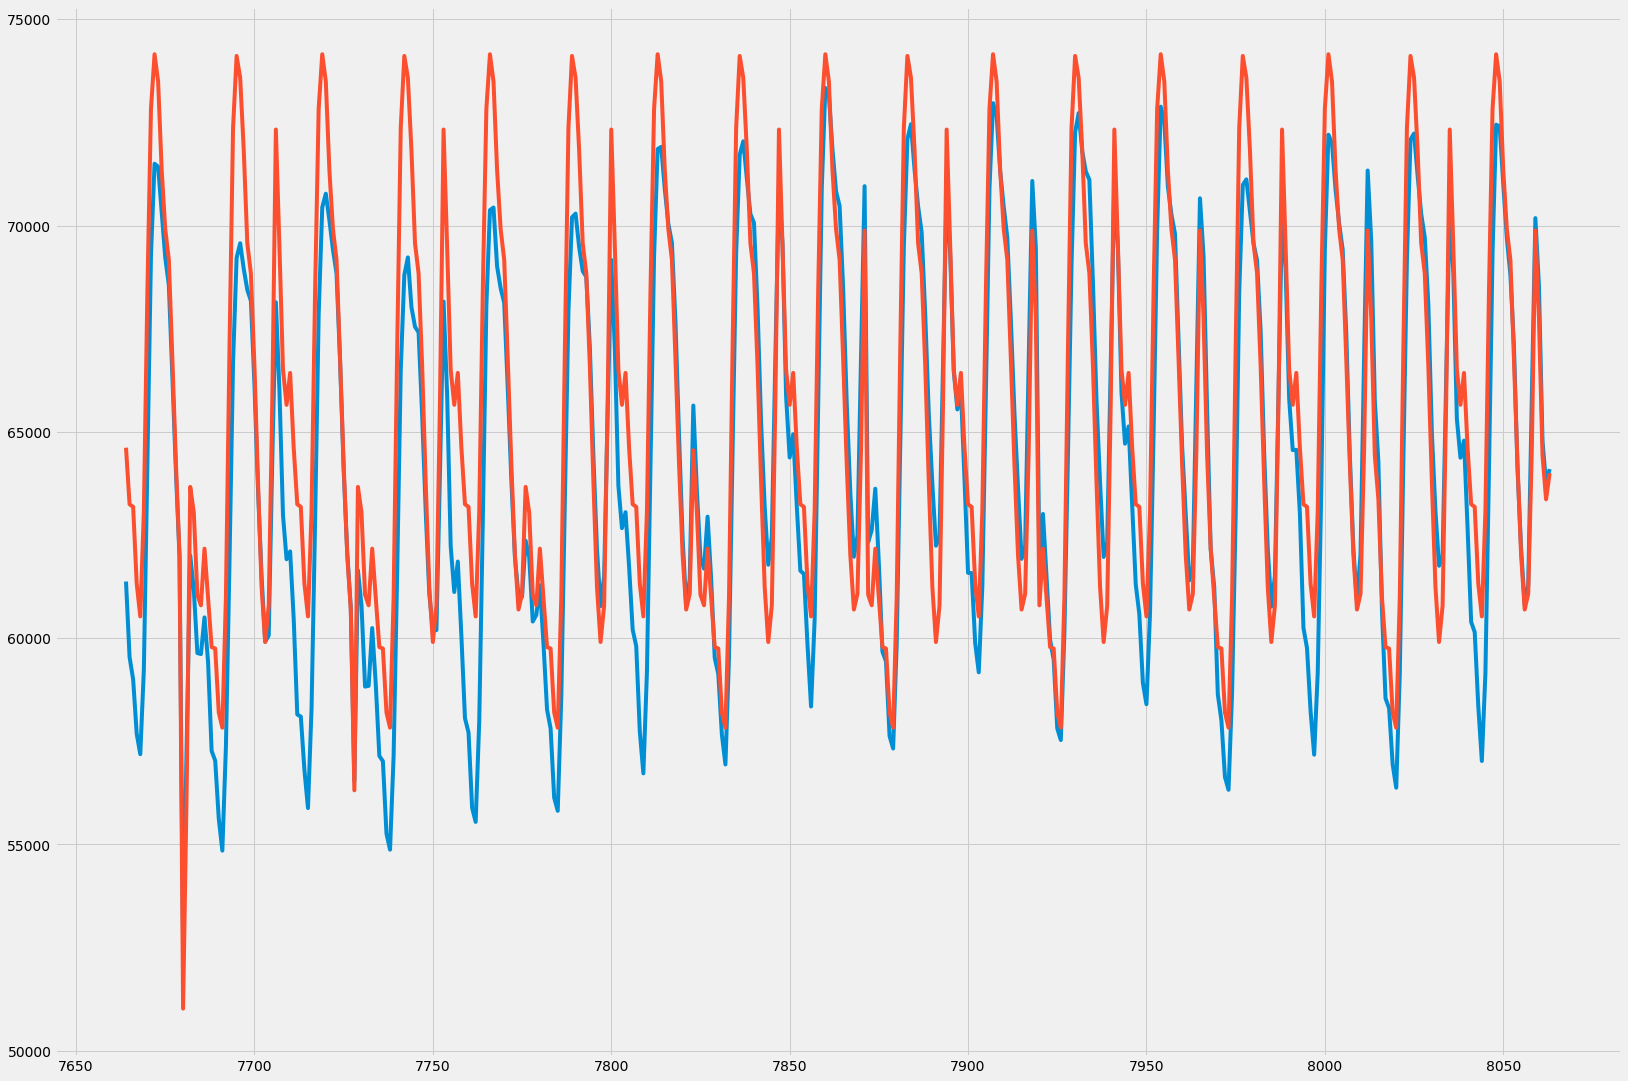

In [ ]:
plt.figure(figsize=(25,18))
plt.plot(result[-400:][:])
